## Naver 검색어트렌드 
- 설정한 검색기간중 가장 높은 검색빈도를 보인 시점을 100으로 하고, 상대적인 검색량을 보여준다.
- https://developers.naver.com/docs/datalab/search/#%EA%B0%9C%EC%9A%94
- 네이버 통합검색에서의 검색 추이 데이터를 JSON 형식으로 반환한다
- Naver Trend API 하루 호출 한도 : 1000회
- 성별
- 연령별(5살 단위)


In [108]:
# 특정 기간동안 연령별, 키워드별로 어떤 시기에 어떤 아이템을 가장 많이 찾는지를 알아보는 작업.
# 1차 : 쇼핑 플랫폼에서 사람들이 가장 선호하는 제품 키워드 각각 10개 정도씩 뽑아서 리스트업.
# 2차 : 구글, Naver에서 제공하는 검색트렌트 api에 이 키워드들을 넣어서 성별, 연령별 검색량의 추이(지정한 기간 내에서의..) 파악.

In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rc
import json
import requests
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### 네이버 쇼핑 카테고리별 동향파악
- https://openapi.naver.com/v1/datalab/shopping/categories
- 어떤 제품의 카테고리별 동향 파악
- catId=50000000 : 패션의류
- catId=50000001 : 패션잡화 
- catId=50000002 : 화장품/미용
- catId=50000003 : 디지털/가전
- catId=50000004 : 가구/인테리어
- catId=50000005 : 출산/육아
- catId=50000006 : 식품
- catId=50000007 : 스포츠/레저
- catId=50000008 : 생활/건강
- catId=50000009 : 여가/생활편의
- catId=50000010 : 면세점

In [198]:
def naver_shopping_trend_cat(cat, gender, ages, startDate, endDate, timeUnit):
    '''
    cat : 카테고리 고유아이디 (str)
    gender : f, m (str)
    ages : 20(20대), 30(30대), ... (str)
    startDate, endDate : YYYY-MM-DD (str)
    timeUnit : date, week, month (str)
    '''
    
    # Naver developer datalab 어플리케이션 ID, SECRET
    CLIENT_ID = 'u6hiDqzI59KsFrcace7m'
    CLIENT_SECRET = 'Sx11g43rrR'
    
    cat_dict = {
        '50000000' : '패션의류',
        '50000001' : '패션잡화',
        '50000002' : '화장품/미용',
        '50000003' : '디지털/가전',
        '50000004' : '가구/인테리어',
        '50000005' : '출산/육아',
        '50000006' : '식품',
        '50000007' : '스포츠/레저',
        '50000008' : '생활/건강',
        '50000009' : '여가/생활편의',
        '50000010' : '면세점'
    }
    
    
    url = 'https://openapi.naver.com/v1/datalab/shopping/categories'
    headers = {
        "Content-Type": "application/json",
        "X-Naver-Client-Id": CLIENT_ID,
        "X-Naver-Client-Secret": CLIENT_SECRET
    }
    params = {
        "startDate": startDate,
        "endDate": endDate,
        "timeUnit": timeUnit,
        "category": [
            {"name": cat_dict[cat], "param": [cat]},
        ],
        "gender": gender, 
        "ages": ages   
    }
    
    response = requests.post(url, json.dumps(params), headers=headers)
    
    if response.ok != True:
        print(response.ok)
        return ("==================================== Error ====================================", response.json())
    
    # 받아온 데이터 전처리
    datas = response.json()['results']

    dfs = []
    for data in datas:
        df = pd.DataFrame(data["data"])
        df["title"] = data["title"]
        dfs.append(df)

    result_df = pd.concat(dfs, ignore_index=True)
    result_df.plot(x='period', y='ratio', figsize=(14, 6));

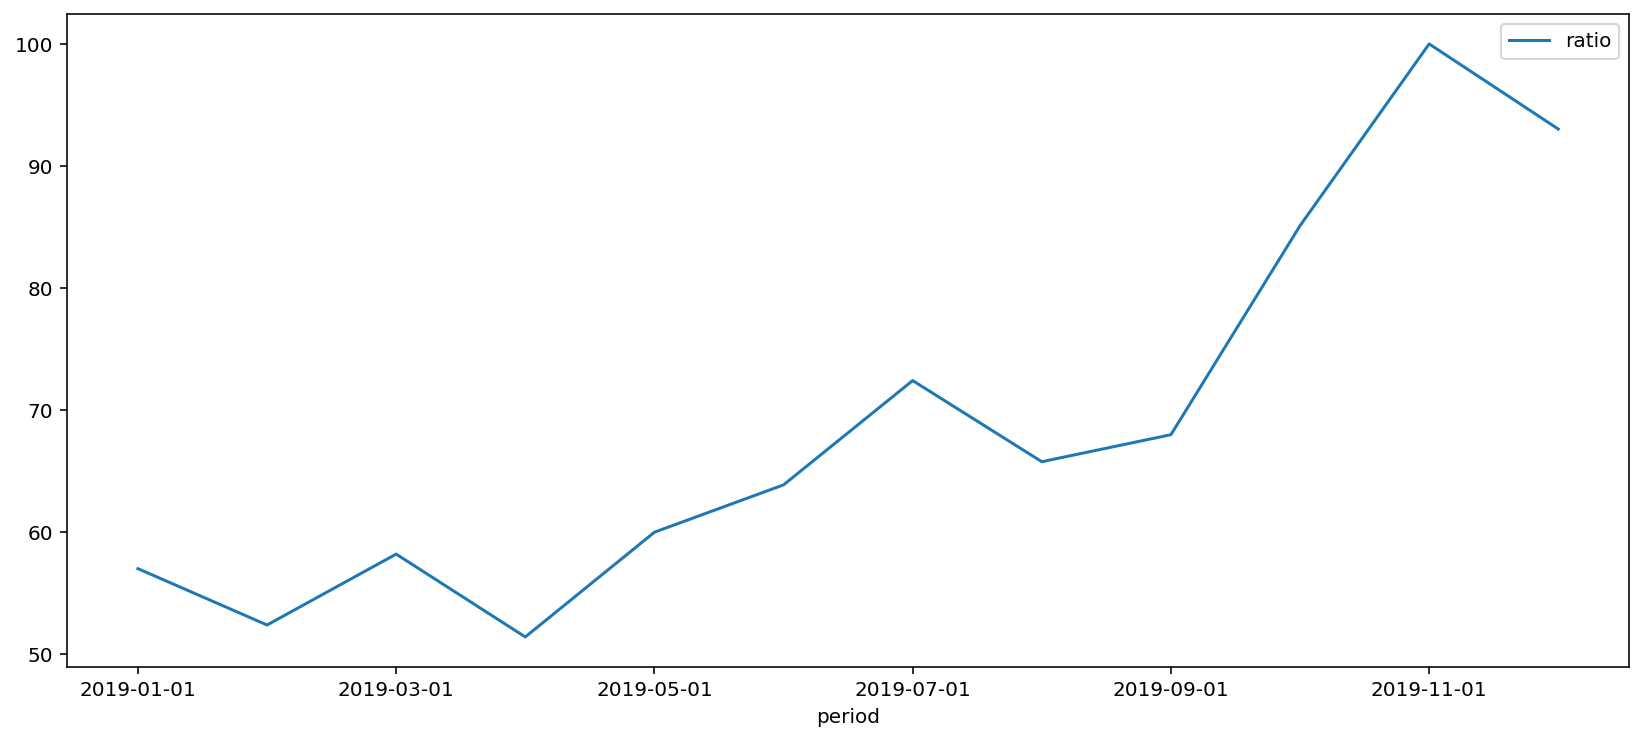

In [206]:
naver_shopping_trend_cat('50000000', 'f', ['60'], '2019-01-01', '2019-12-30', 'month')